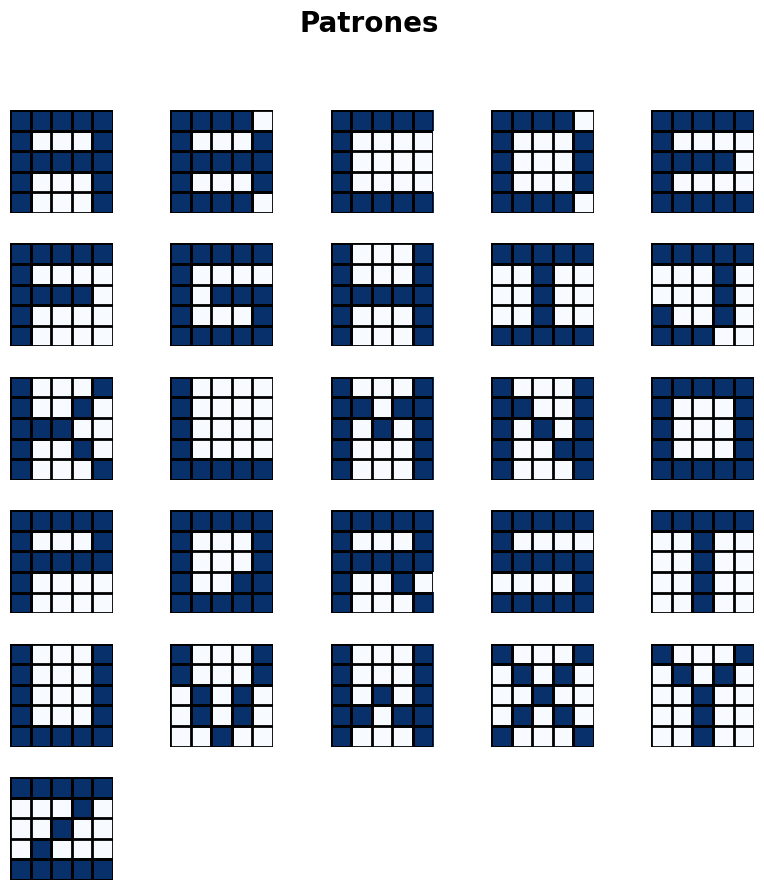

In [2]:
from src.parser_files import get_letters
from src.plots import *

letters = get_letters("data/letters.txt")
plot_letters(letters, "Patrones")

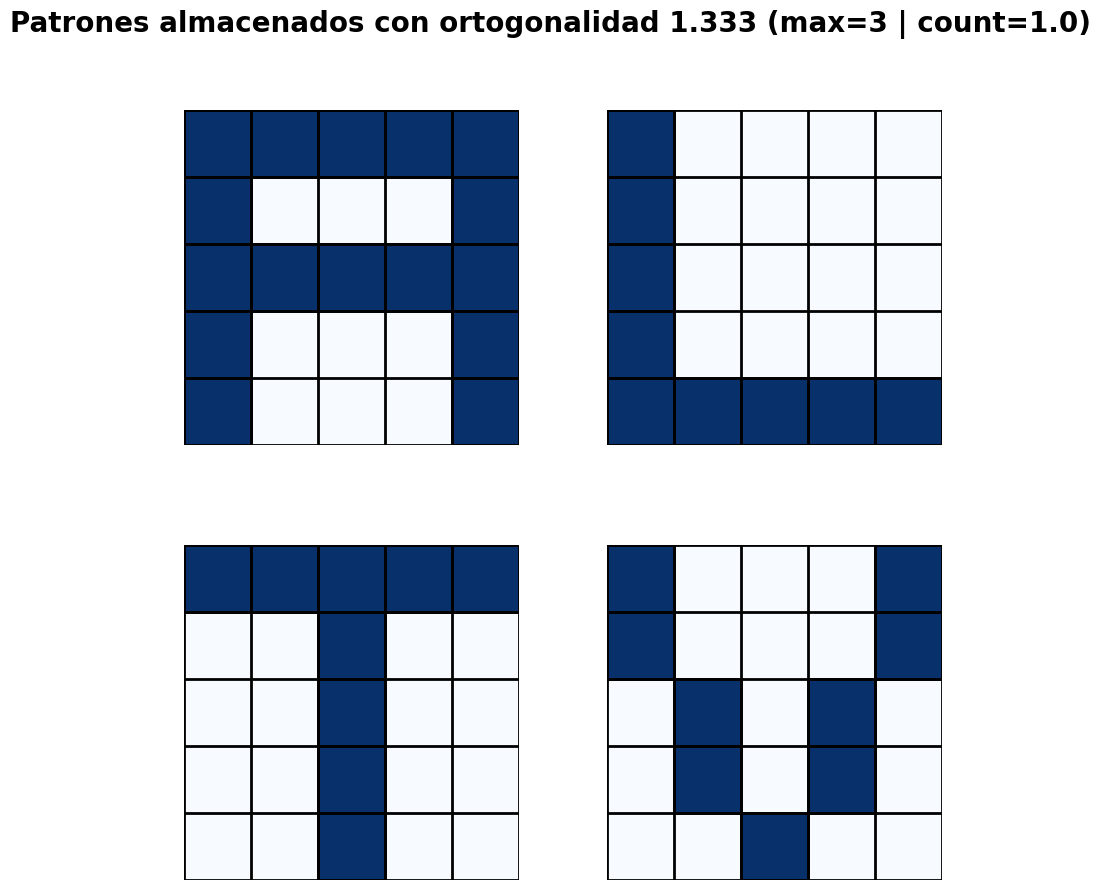

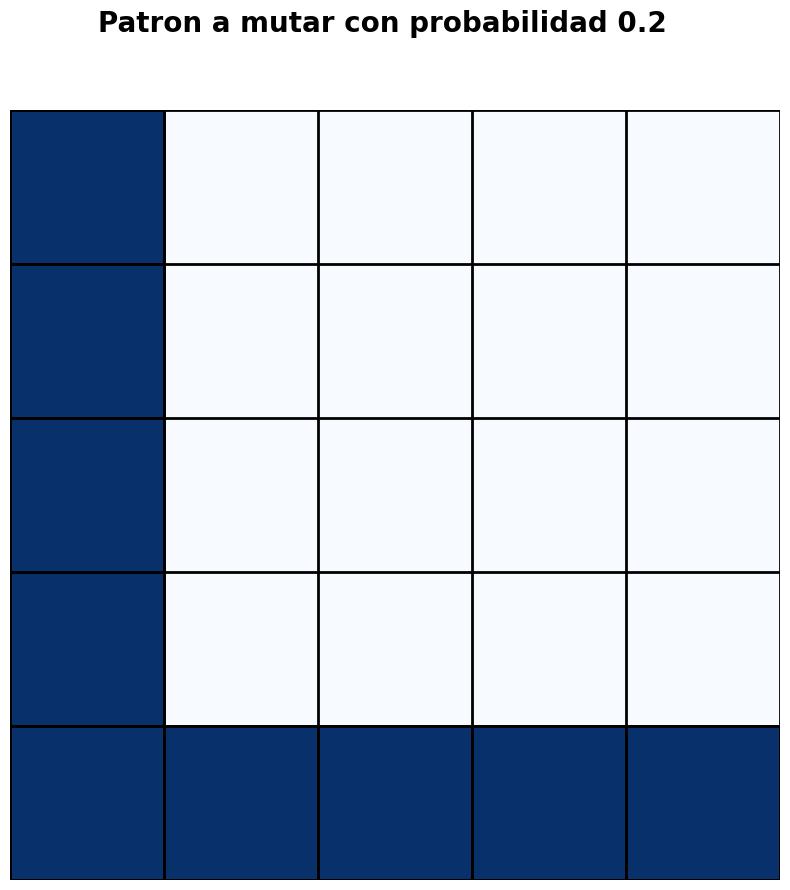

-------------------------
[[ 1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1.
   1. -1.  1. -1. -1. -1.  1.]
 [ 1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  -1. -1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.
  -1. -1.  1.  1.  1.  1.  1.]
 [ 1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1. -1.
  -1. -1.  1.  1.  1.  1.  1.]]
[-3.68, -8.32, -10.72, -10.72]


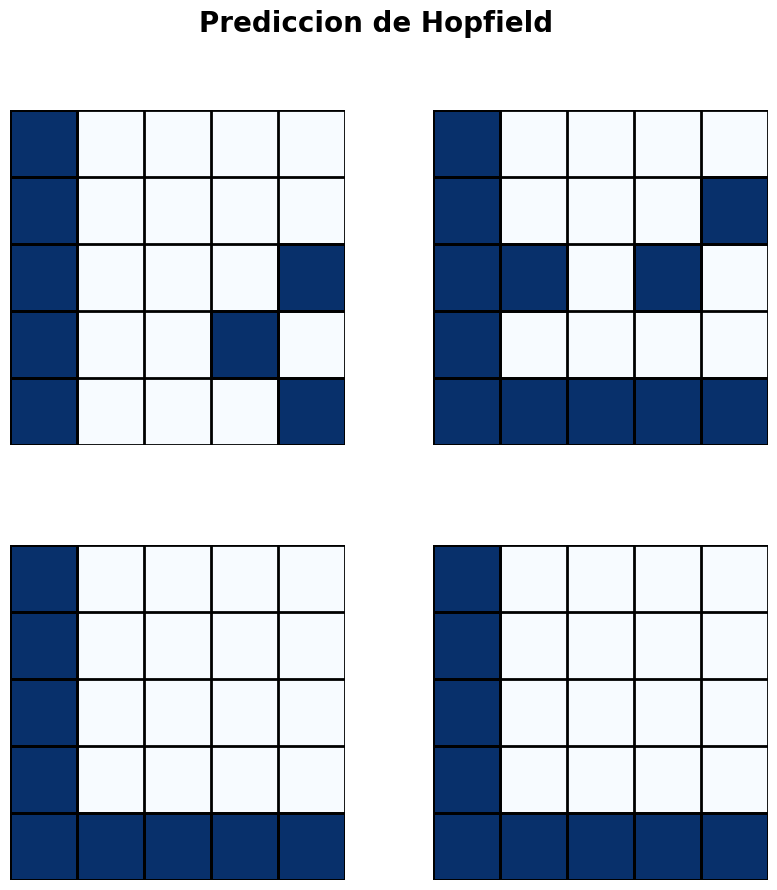

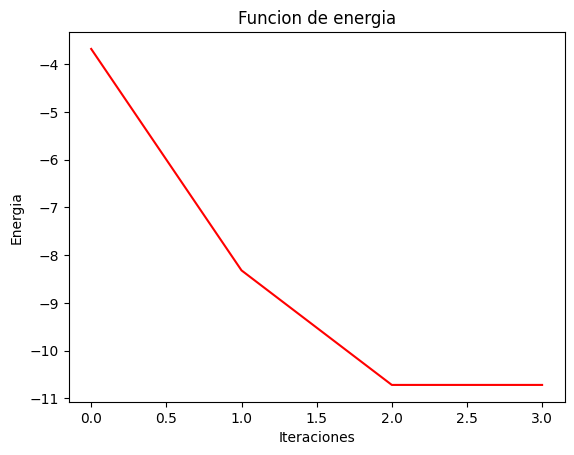

In [12]:
from src.utils import mutate, calculate_ortogonality
from src.plots import *
from src.networks.Hopfield import Hopfield
import numpy as np

EPOCHS = 100
MUTATE_PROB = 0.2

"""
COUNT_LETTERS = 4
letters_to_train = []
idxs = np.random.choice(len(letters), size=COUNT_LETTERS, replace=False)
for idx in idxs:
    letters_to_train.append(letters[idx])
"""
letters_to_train = [letters[0], letters[11], letters[19], letters[21]]
#letters_to_train = [letters[14], letters[16], letters[24], letters[25]]
letters_to_train = np.array(letters_to_train)
avg_dot_product, max_value, max_dot_product = calculate_ortogonality(letters_to_train) 
plot_letters(letters_to_train, f"Patrones almacenados con ortogonalidad {avg_dot_product} (max={max_value} | count={max_dot_product})")

hopfield = Hopfield(letters_to_train, EPOCHS)

random_idx = np.random.randint(len(letters_to_train))
letter_to_mutate = letters_to_train[random_idx]
plot_letters(letter_to_mutate.reshape((1, len(letter_to_mutate))), f"Patron a mutar con probabilidad {MUTATE_PROB}")

letter_mutated = mutate(letter_to_mutate, MUTATE_PROB)
arr_patterns, arr_energy = hopfield.predict(letter_mutated)

print("-------------------------")
print(arr_patterns)
print(arr_energy)
plot_letters(arr_patterns, "Prediccion de Hopfield")
plot_energy(arr_energy)